# AllLife Bank Customer Segmentation

## Context
- In the year to come, AllLife Bank plans to concentrate on its credit card user base.
- Their marketing research team has given them advice on how to increase market penetration. The marketing team suggests running customized campaigns to target both new customers and existing customers for upselling.
- The clients' negative perception of the back support services was another finding from the market research. The Operations team intends to improve the service delivery model in light of this in order to ensure that customer inquiries are handled quickly.

- Both the head of marketing and the head of delivery decide to ask the data science team for assistance.


### Data Description 
- The data provided is of various customers of a bank and their financial attributes like credit limit, the total number of credit cards the customer has, and different channels through which customers have contacted the bank for any queries (including visiting the bank, online and through a call center).

### Objective
- To identify different segments in the existing customer, based on their spending patterns as well as past interaction with the bank, using clustering algorithms, and provide recommendations to the bank on how to better market to and service these customers.

### Data Dictionary

- Sl_No: Primary key of the records
- Customer Key: Customer identification number
- Average Credit Limit: Average credit limit of each customer for all credit cards
- Total credit cards: Total number of credit cards possessed by the customer
- Total visits bank: Total number of visits that customer made (yearly) personally to the bank
- Total visits online: Total number of visits or online logins made by the customer (yearly)
- Total calls made: Total number of calls made by the customer to the bank or its customer service department (yearly)

In [1]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to perform Hierarchical clustering
from sklearn.cluster import AgglomerativeClustering

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

from scipy.cluster.hierarchy import cophenet, dendrogram, linkage

# Pairwise distribution between data points
from scipy.spatial.distance import pdist

<IPython.core.display.Javascript object>

In [2]:
# loading the dataset
data1 = pd.read_excel("CreditCard.xlsx")

<IPython.core.display.Javascript object>

In [3]:
# taking a copy of input as working file
data = data1.copy()

<IPython.core.display.Javascript object>

In [4]:
data.shape

(660, 7)

<IPython.core.display.Javascript object>

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


<IPython.core.display.Javascript object>

In [6]:
# viewing a random sample of the dataset
data.sample(n=10, random_state=1)

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
547,548,38125,26000,4,5,2,4
353,354,94437,9000,5,4,1,3
499,500,65825,68000,6,4,2,2
173,174,38410,9000,2,1,5,8
241,242,81878,10000,4,5,1,3
341,342,70779,18000,4,3,2,0
647,648,79953,183000,9,0,9,2
218,219,28208,19000,3,1,5,7
120,121,16577,10000,4,2,4,6
134,135,31256,13000,4,1,5,7


<IPython.core.display.Javascript object>

Observation

- There are 660 observations and non null values in the dataset
- there are 7 columns in the dataset.
- All columns in the dataset are of int64 data type.
- There are no missing values

In [7]:
data.nunique()

Sl_No                  660
Customer Key           655
Avg_Credit_Limit       110
Total_Credit_Cards      10
Total_visits_bank        6
Total_visits_online     16
Total_calls_made        11
dtype: int64

<IPython.core.display.Javascript object>

In [8]:
# let's check for duplicate values in the data
data.duplicated().sum()

0

<IPython.core.display.Javascript object>

In [9]:
data.drop(columns=["Sl_No", "Customer Key"], inplace=True)

<IPython.core.display.Javascript object>

In [10]:
data

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3
...,...,...,...,...,...
655,99000,10,1,10,0
656,84000,10,1,13,2
657,145000,8,1,9,1
658,172000,10,1,15,0


<IPython.core.display.Javascript object>

### EDA

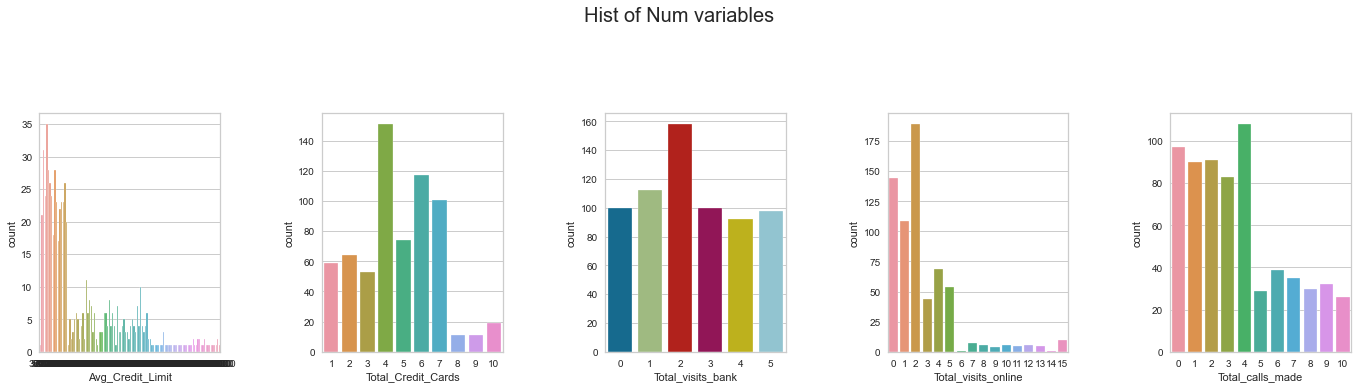

<IPython.core.display.Javascript object>

In [11]:
data_col = data.iloc[:, :].columns.tolist()
fig, axes = plt.subplots(1, 5, figsize=(20, 6))
fig.suptitle("Hist of Num variables", fontsize=20)
counter = 0
for ii in range(5):
    sns.countplot(ax=axes[ii], x=data[data_col[counter]])
    counter = counter + 1

fig.tight_layout(pad=4.0)

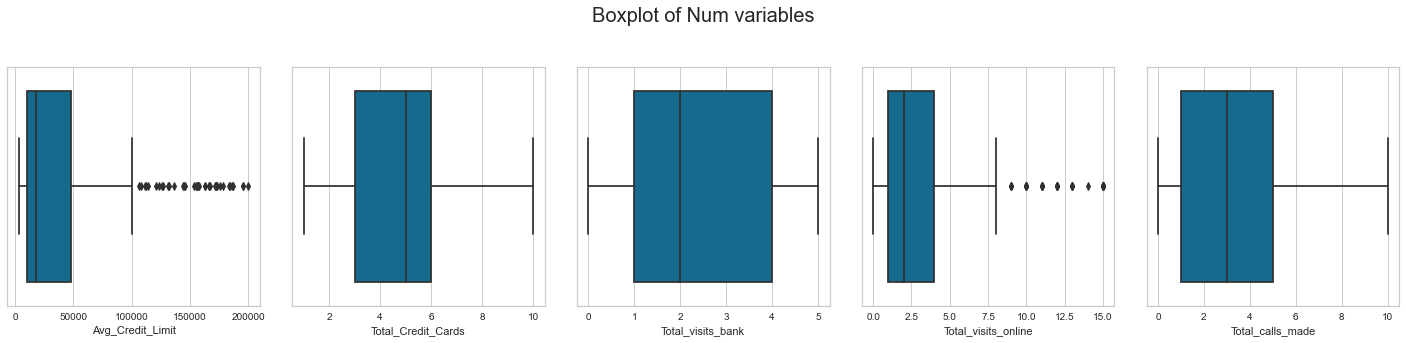

<IPython.core.display.Javascript object>

In [12]:
fig, axes = plt.subplots(1, 5, figsize=(20, 5))
fig.suptitle("Boxplot of Num variables", fontsize=20)
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii], x=data[data_col[counter]])
    counter = counter + 1

fig.tight_layout(pad=2.0)

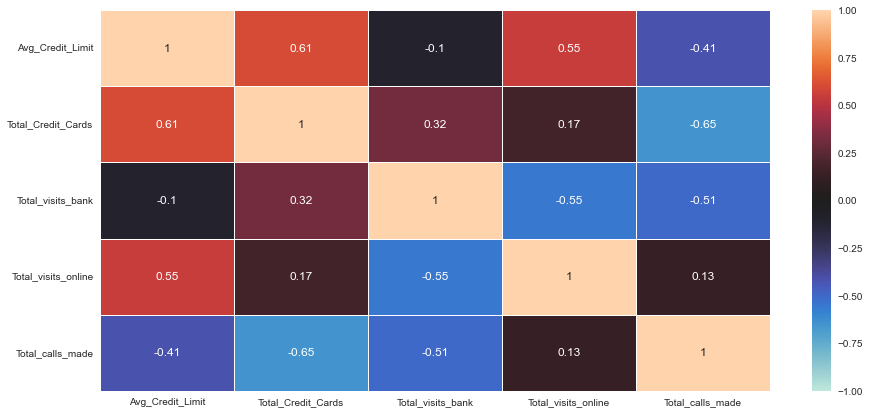

<IPython.core.display.Javascript object>

In [13]:
plt.figure(figsize=(15, 7))

sns.heatmap(
    data[data_col].corr(),
    annot=True,
    linewidths=0.5,
    vmin=-1,
    vmax=1,
    center=0,
    cbar=True,
)

plt.show()

In [14]:
data.corr()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Avg_Credit_Limit,1.000000,0.608860,-0.100312,0.551385,-0.414352
Total_Credit_Cards,0.608860,1.000000,0.315796,0.167758,-0.651251
Total_visits_bank,-0.100312,0.315796,1.000000,-0.551861,-0.506016
Total_visits_online,0.551385,0.167758,-0.551861,1.000000,0.127299
Total_calls_made,-0.414352,-0.651251,-0.506016,0.127299,1.000000


<IPython.core.display.Javascript object>

- total credit cards and total visits online is positively correlated to average credit limit
- total calls made is negatively correlated to average credit limit, total credit cards and total visit banks

### Bivariate Analysis

- pairplot

<Figure size 1440x1440 with 0 Axes>

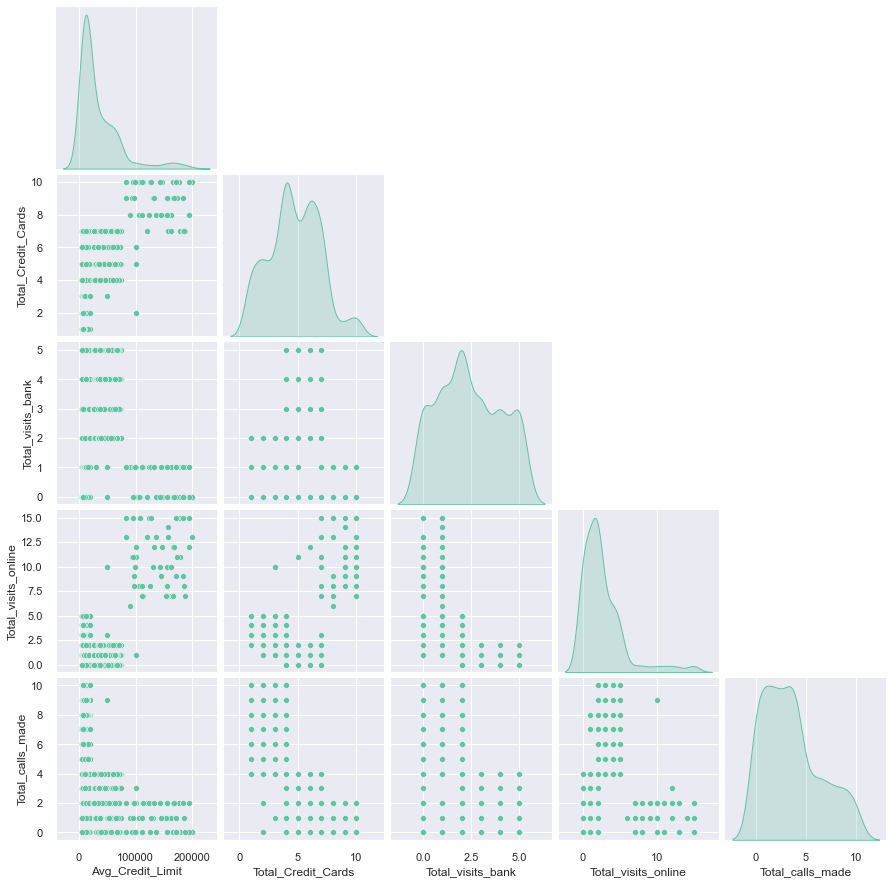

<IPython.core.display.Javascript object>

In [15]:
plt.figure(figsize=(20, 20))
sns.set(palette="Set2")
sns.pairplot(data.iloc[:, :], diag_kind="kde", corner=True)

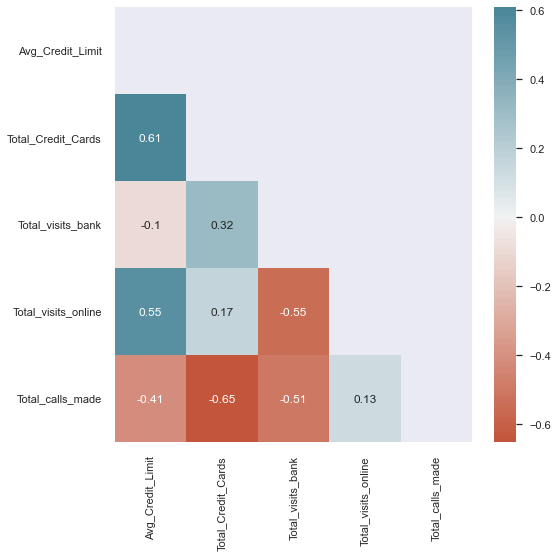

<IPython.core.display.Javascript object>

In [16]:
# Plotting correlation heatmap of the features

mask = np.zeros_like(data.iloc[:, :].corr(), dtype=bool)
mask[np.triu_indices_from(mask)] = True


sns.set(rc={"figure.figsize": (8, 8)})

sns.heatmap(
    data.iloc[:, :].corr(),
    cmap=sns.diverging_palette(20, 220, n=200),
    annot=True,
    mask=mask,
    center=0,
)
plt.show()

In [17]:
# Function to plot numerical feature by each category with target hue


def plot_numeric_by_cat(
    data: pd.DataFrame, category_columns: list, numeric_column: str, hue: str = None
):
    """
    The function plots a numerical feature in box plot by every category column specified in the list, 
    with hue of a target category
    """
    num_cols = 2
    num_rows = int(len(category_columns) / 2 + 1)

    plt.figure(figsize=(20, 8 * num_rows))
    for i, col in enumerate(category_columns):
        plt.subplot(num_rows, num_cols, i + 1)
        sns.set(palette="nipy_spectral")
        sns.boxplot(data=data, x=col, y=numeric_column, hue=hue, showfliers=True).set(
            title=numeric_column + " vs. " + col
        )

<IPython.core.display.Javascript object>

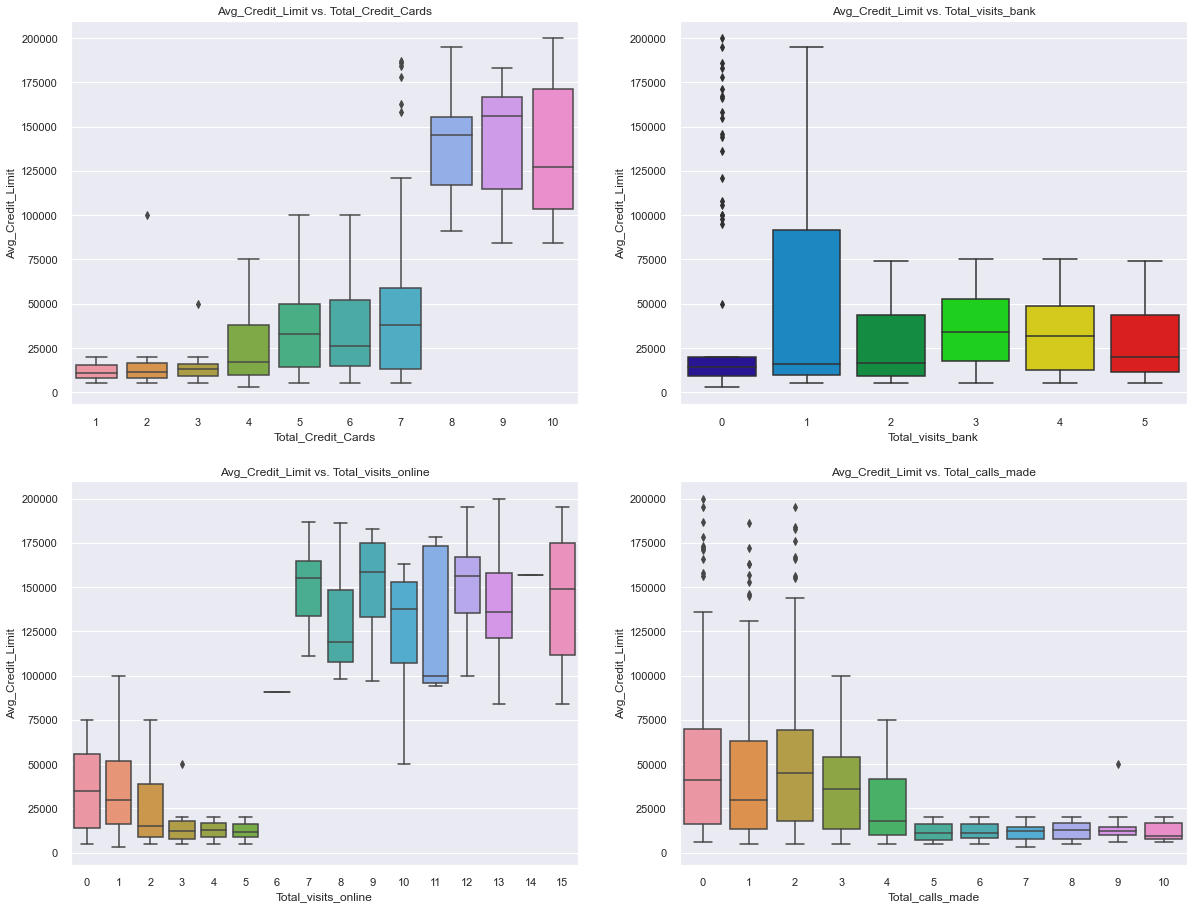

<IPython.core.display.Javascript object>

In [18]:
plot_numeric_by_cat(
    data,
    category_columns=[
        "Total_Credit_Cards",
        "Total_visits_bank",
        "Total_visits_online",
        "Total_calls_made",
    ],
    numeric_column="Avg_Credit_Limit",
)

## Data Preprocessing

In [19]:
# Scaling the data set before clustering
scaler = StandardScaler()
subset = data[data_col].copy()
subset_scaled = scaler.fit_transform(subset)

<IPython.core.display.Javascript object>

In [20]:
# Creating a dataframe from the scaled data above
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)
subset_scaled_df

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537
1,0.410293,-0.787585,-1.473731,2.520519,1.891859
2,0.410293,1.058973,-0.860451,0.134290,0.145528
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528
4,1.740187,0.597334,-1.473731,3.202298,-0.203739
...,...,...,...,...,...
655,1.713589,2.443892,-0.860451,2.520519,-1.251537
656,1.314621,2.443892,-0.860451,3.543188,-0.553005
657,2.937092,1.520613,-0.860451,2.179629,-0.902271
658,3.655235,2.443892,-0.860451,4.224968,-1.251537


<IPython.core.display.Javascript object>

## K-means Clustering

Number of Clusters: 1 	Average Distortion: 2.0069222262503614
Number of Clusters: 2 	Average Distortion: 1.4571553548514269
Number of Clusters: 3 	Average Distortion: 1.1466276549150365
Number of Clusters: 4 	Average Distortion: 1.0463825294774465
Number of Clusters: 5 	Average Distortion: 0.9907383936093271
Number of Clusters: 6 	Average Distortion: 0.9430693962124551
Number of Clusters: 7 	Average Distortion: 0.9090837787089351
Number of Clusters: 8 	Average Distortion: 0.8933064538521244


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

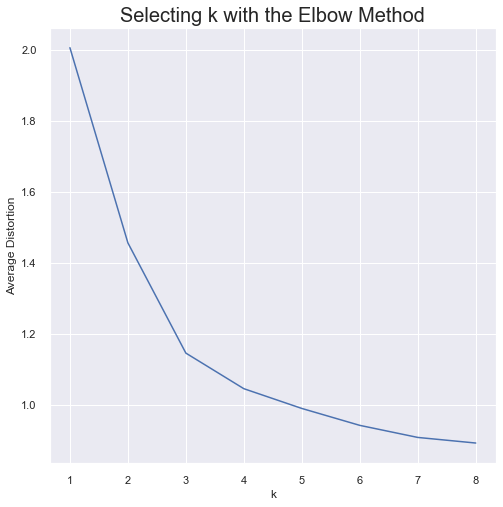

<IPython.core.display.Javascript object>

In [21]:
clusters = range(1, 9)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k, n_init=10)
    model.fit(subset_scaled_df)
    prediction = model.predict(subset_scaled_df)
    distortion = (
        sum(
            np.min(cdist(subset_scaled_df, model.cluster_centers_, "euclidean"), axis=1)
        )
        / subset_scaled_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)

- Appropriate value for k seems to be 3

**Let's check the silhouette scores.**

For n_clusters = 2, the silhouette score is 0.41842496663215445)
For n_clusters = 3, the silhouette score is 0.5157182558881063)
For n_clusters = 4, the silhouette score is 0.3556670619372605)
For n_clusters = 5, the silhouette score is 0.2726698397729061)
For n_clusters = 6, the silhouette score is 0.25583657571102003)
For n_clusters = 7, the silhouette score is 0.23052355946697936)
For n_clusters = 8, the silhouette score is 0.22673228192114367)
For n_clusters = 9, the silhouette score is 0.22576326950210254)


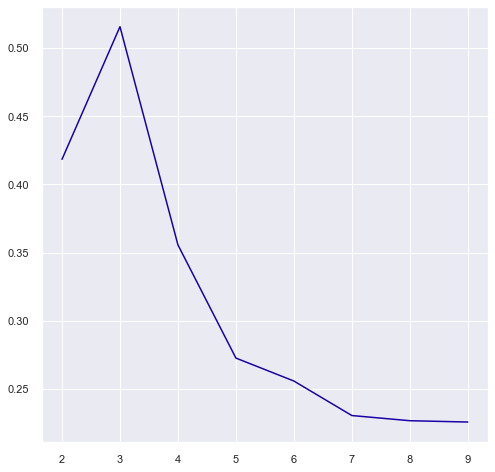

<IPython.core.display.Javascript object>

In [22]:
sil_score = []
cluster_list = list(range(2, 10))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters, n_init=10)
    preds = clusterer.fit_predict((subset_scaled_df))
    # centers = clusterer.cluster_centers_
    score = silhouette_score(subset_scaled_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))

plt.plot(cluster_list, sil_score)
plt.show()

**Silhouette score for 3 clusters is highest. So, we will choose 3 as value of k**

### Visualize the Silhouettes

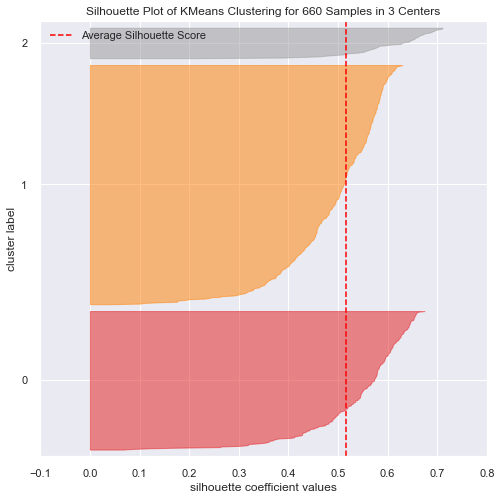

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 660 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

<IPython.core.display.Javascript object>

In [23]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(3, random_state=1, n_init=10))
visualizer.fit(subset_scaled_df)
visualizer.show()

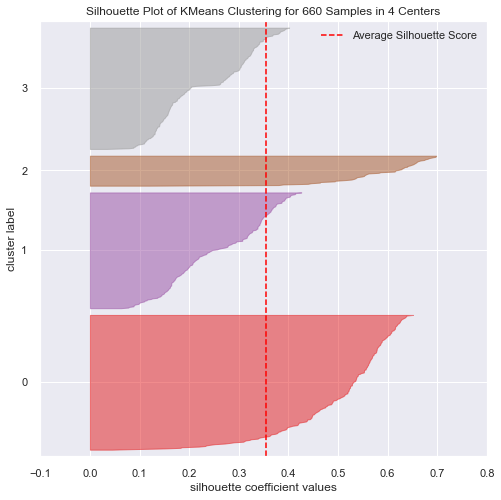

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 660 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

<IPython.core.display.Javascript object>

In [24]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(4, random_state=1, n_init=10))
visualizer.fit(subset_scaled_df)
visualizer.show()

### Build the model with 3 centroids
**cluster profiling**

In [25]:
kmeans = KMeans(n_clusters=3, random_state=0, n_init=10)
kmeans.fit(subset_scaled_df)
KMeans(n_clusters=3, random_state=0)
data["K_means_segments"] = kmeans.labels_
cluster_profile = data.groupby("K_means_segments").mean()
cluster_profile["count_in_each_segment"] = (
    data.groupby("K_means_segments")["Avg_Credit_Limit"].count().values
)
cluster_profile

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segment
K_means_segments,,,,,,
0,33782.383420,5.515544,3.489637,0.981865,2.000000,386
1,12174.107143,2.410714,0.933036,3.553571,6.870536,224
2,141040.000000,8.740000,0.600000,10.900000,1.080000,50


<IPython.core.display.Javascript object>

In [26]:
data["K_means_segments"]

0      0
1      1
2      0
3      0
4      2
      ..
655    2
656    2
657    2
658    2
659    2
Name: K_means_segments, Length: 660, dtype: int32

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='K_means_segments'>

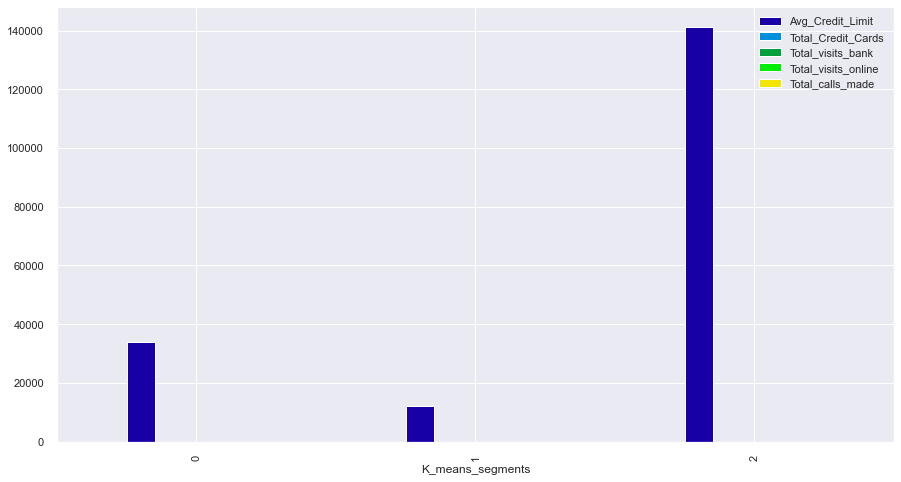

<IPython.core.display.Javascript object>

In [27]:
data.groupby("K_means_segments").mean().plot.bar(figsize=(15, 8))

In [ ]:
data.groupby("K_means_segments").mean().plot.bar(figsize=(15, 8))

### Build the model with 4 centroids

In [28]:
kmeans = KMeans(n_clusters=4, random_state=0, n_init=10)
kmeans.fit(subset_scaled_df)
KMeans(n_clusters=4, random_state=0)
data["K_means_segments"] = kmeans.labels_
cluster_profile = data.groupby("K_means_segments").mean()
cluster_profile["count_in_each_segment"] = (
    data.groupby("K_means_segments")["Avg_Credit_Limit"].count().values
)
cluster_profile

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segment
K_means_segments,,,,,,
0,31226.315789,5.478947,4.515789,1.010526,1.936842,190
1,12167.420814,2.393665,0.927602,3.574661,6.923077,221
2,141040.000000,8.740000,0.600000,10.900000,1.080000,50
3,35904.522613,5.522613,2.477387,0.969849,2.075377,199


<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='K_means_segments'>

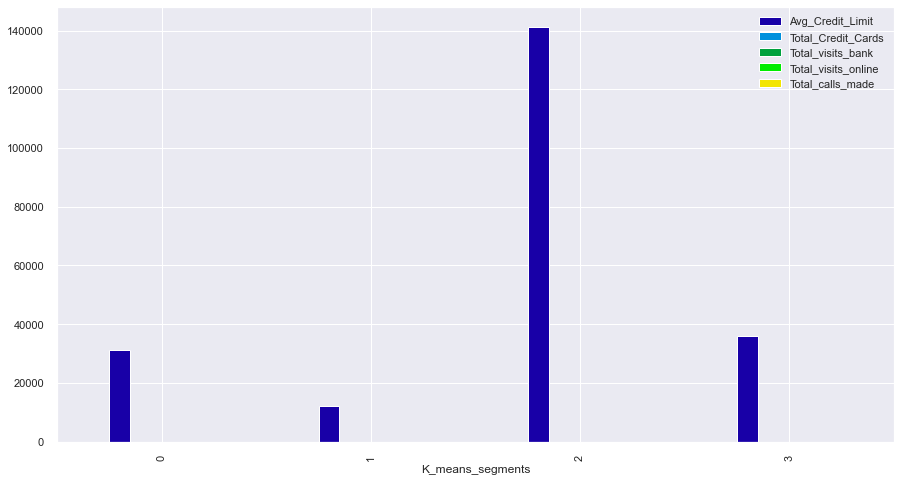

<IPython.core.display.Javascript object>

In [29]:
data.groupby("K_means_segments").mean().plot.bar(figsize=(15, 8))

### appropriate number of k clusters is 3 

Group 1: Call centre

- Almost never visits the bank or uses online services
- Huge number of calls made
- Second largest group
- Very low credit limit
- Low number of credit cards


Group 0: visiting the bank (in person)

- Visits the bank often
- Almost no online usage
- Calls rarely
- Largest group
- Mid number of credit cards


Group 2: Online

- Smallest group, and by a large margine
- Huge credit limit
- Lots of credit cards
- Almost never visits the bank
- Banks online extensively
- Almost never calls

### Hierarchical clustering

In [30]:
data1.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


<IPython.core.display.Javascript object>

In [31]:
custDataAttr = data1.iloc[:, 2:]
custDataAttr.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3


<IPython.core.display.Javascript object>

In [32]:
from scipy.stats import zscore

<IPython.core.display.Javascript object>

In [33]:
custDataScaled = custDataAttr.apply(zscore)
custDataScaled.head(10)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537
1,0.410293,-0.787585,-1.473731,2.520519,1.891859
2,0.410293,1.058973,-0.860451,0.134290,0.145528
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528
4,1.740187,0.597334,-1.473731,3.202298,-0.203739
5,-0.387644,-0.787585,-1.473731,-0.547490,1.542593
6,1.740187,0.135694,-1.473731,2.861408,-0.553005
7,-0.520633,-0.787585,-1.473731,-0.547490,-0.902271
8,-0.786612,-1.249225,-1.473731,-0.206600,-0.553005
9,-0.839808,-0.325946,-1.473731,-0.547490,1.193326


<IPython.core.display.Javascript object>

In [34]:
model1 = AgglomerativeClustering(n_clusters=3, metric="euclidean", linkage="average")

<IPython.core.display.Javascript object>

In [35]:
model1.fit(custDataScaled)

AgglomerativeClustering(linkage='average', metric='euclidean', n_clusters=3)

<IPython.core.display.Javascript object>

In [36]:
custDataAttr["labels"] = model1.labels_
custDataAttr.head(10)

# custDataAttr.groupby(["labels"]).count()

C:\Users\DELL\AppData\Local\Temp/ipykernel_3636/212519760.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  custDataAttr["labels"] = model1.labels_


,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,labels
0,100000,2,1,1,0,0
1,50000,3,0,10,9,2
2,50000,7,1,3,4,0
3,30000,5,1,1,4,0
4,100000,6,0,12,3,1
5,20000,3,0,1,8,2
6,100000,5,0,11,2,1
7,15000,3,0,1,1,2
8,5000,2,0,2,2,2
9,3000,4,0,1,7,2


<IPython.core.display.Javascript object>

In [37]:
custDataClust = custDataAttr.groupby(["labels"])
custDataClust.mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
labels,,,,,
0,33713.178295,5.511628,3.485788,0.984496,2.005168
1,141040.000000,8.740000,0.600000,10.900000,1.080000
2,12197.309417,2.403587,0.928251,3.560538,6.883408


<IPython.core.display.Javascript object>

**Cophenetic correlation for Euclidean distance and Average linkage**

In [38]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(custDataScaled, metric="euclidean", method="average")
c, coph_dists = cophenet(Z, pdist(custDataScaled))

c

0.8977080867389372

<IPython.core.display.Javascript object>

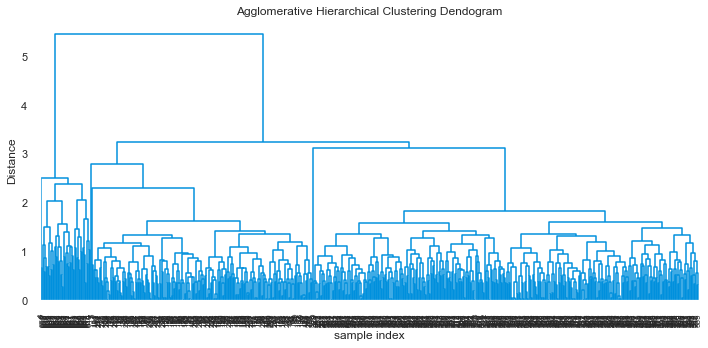

<IPython.core.display.Javascript object>

In [39]:
plt.figure(figsize=(10, 5))
plt.title("Agglomerative Hierarchical Clustering Dendogram")
plt.xlabel("sample index")
plt.ylabel("Distance")
dendrogram(Z, leaf_rotation=90.0, color_threshold=40, leaf_font_size=8.0)
plt.tight_layout()

**Cophenetic correlation for Euclidean distance and Complete linkage**

In [40]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(custDataScaled, metric="euclidean", method="complete")
c, coph_dists = cophenet(Z, pdist(custDataScaled))

c

0.8599730607972423

<IPython.core.display.Javascript object>

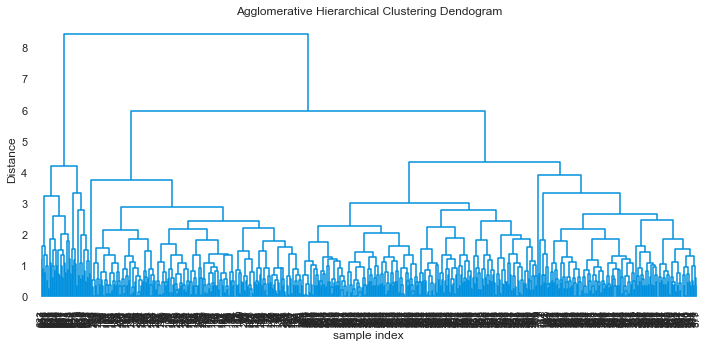

<IPython.core.display.Javascript object>

In [41]:
plt.figure(figsize=(10, 5))
plt.title("Agglomerative Hierarchical Clustering Dendogram")
plt.xlabel("sample index")
plt.ylabel("Distance")
dendrogram(Z, leaf_rotation=90.0, color_threshold=90, leaf_font_size=10.0)
plt.tight_layout()

**Cophenetic correlation for Euclidean distance and Ward linkage**

In [42]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(custDataScaled, metric="euclidean", method="ward")
c, coph_dists = cophenet(Z, pdist(custDataScaled))

c

0.7415156284827493

<IPython.core.display.Javascript object>

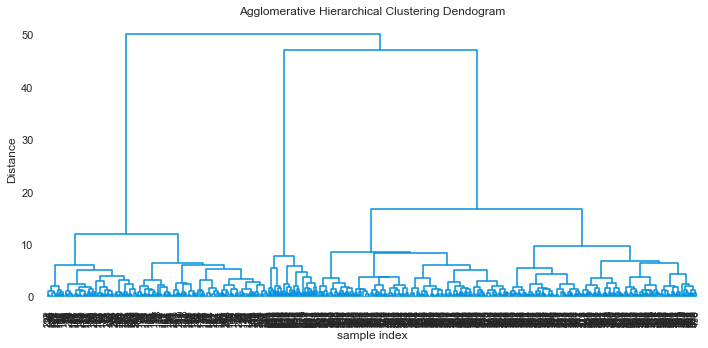

<IPython.core.display.Javascript object>

In [43]:
plt.figure(figsize=(10, 5))
plt.title("Agglomerative Hierarchical Clustering Dendogram")
plt.xlabel("sample index")
plt.ylabel("Distance")
dendrogram(Z, leaf_rotation=90.0, color_threshold=600, leaf_font_size=10.0)
plt.tight_layout()

**Cophenetic correlation for Euclidean distance and Single linkage**

In [44]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Y = linkage(custDataScaled, metric="euclidean", method="single")
c, coph_dists = cophenet(Y, pdist(custDataScaled))

c

0.7391220243806552

<IPython.core.display.Javascript object>

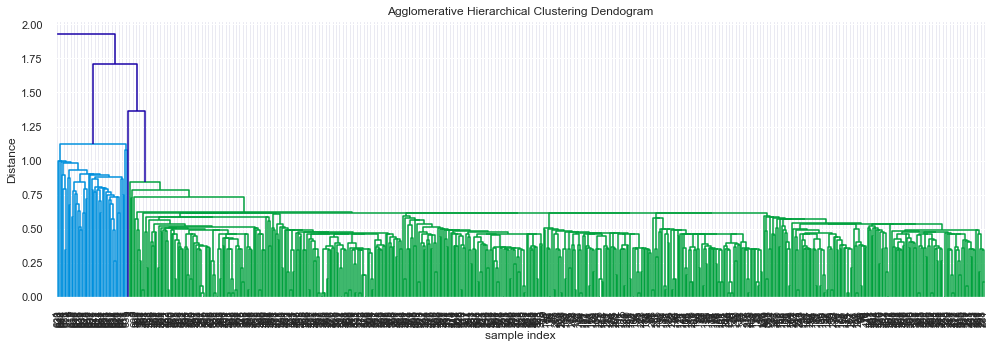

<IPython.core.display.Javascript object>

In [45]:
plt.figure(figsize=(14, 5))
plt.title("Agglomerative Hierarchical Clustering Dendogram")
plt.xlabel("sample index")
plt.ylabel("Distance")
dendrogram(Y, leaf_rotation=90.0, leaf_font_size=10.0)
plt.tight_layout()

**Cophenetic correlation for Euclidean distance and centroid linkage**

In [46]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

X = linkage(custDataScaled, metric="euclidean", method="centroid")
c, coph_dists = cophenet(X, pdist(custDataScaled))

c

0.8939385846326323

<IPython.core.display.Javascript object>

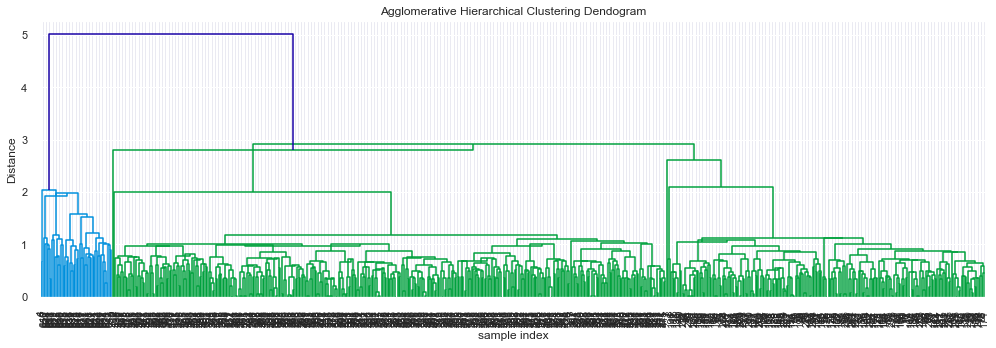

<IPython.core.display.Javascript object>

In [47]:
plt.figure(figsize=(14, 5))
plt.title("Agglomerative Hierarchical Clustering Dendogram")
plt.xlabel("sample index")
plt.ylabel("Distance")
dendrogram(X, leaf_rotation=90.0, leaf_font_size=10.0)
plt.tight_layout()

### Mahalanobis
**Cophenetic correlation for Mahalanobis distance and average linkage**

In [48]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(custDataScaled, metric="mahalanobis", method="average")
c, coph_dists = cophenet(Z, pdist(custDataScaled))

c

0.8326994115042134

<IPython.core.display.Javascript object>

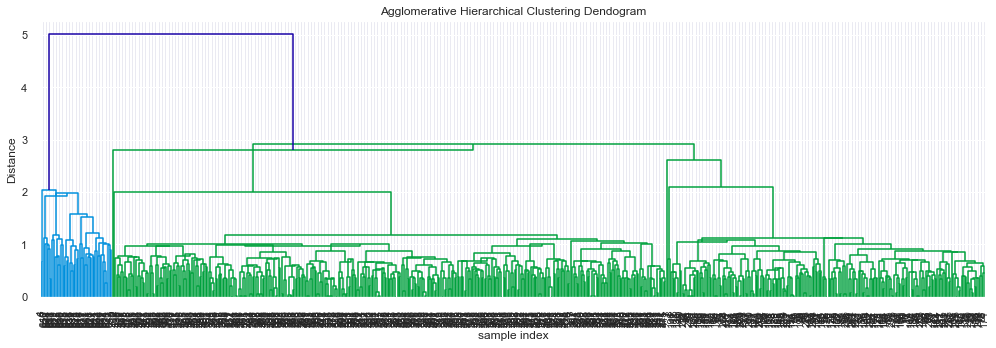

<IPython.core.display.Javascript object>

In [49]:
plt.figure(figsize=(14, 5))
plt.title("Agglomerative Hierarchical Clustering Dendogram")
plt.xlabel("sample index")
plt.ylabel("Distance")
dendrogram(X, leaf_rotation=90.0, leaf_font_size=10.0)
plt.tight_layout()

**Cophenetic correlation for Mahalanobis distance and single linkage**

In [50]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(custDataScaled, metric="mahalanobis", method="single")
c, coph_dists = cophenet(Z, pdist(custDataScaled))

c

0.7058064784553606

<IPython.core.display.Javascript object>

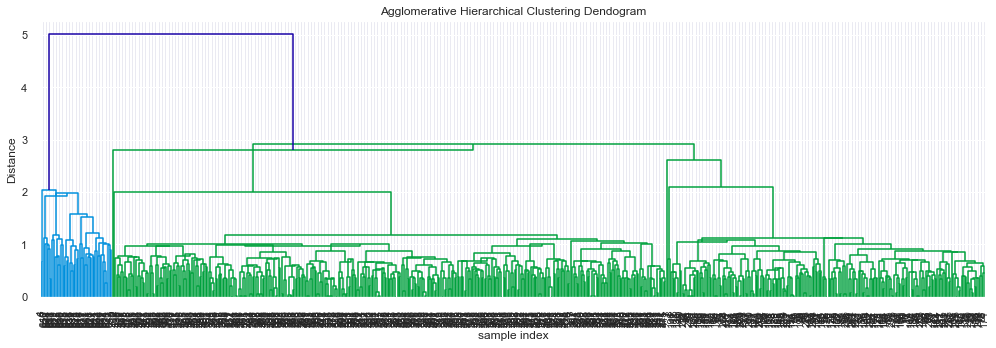

<IPython.core.display.Javascript object>

In [51]:
plt.figure(figsize=(14, 5))
plt.title("Agglomerative Hierarchical Clustering Dendogram")
plt.xlabel("sample index")
plt.ylabel("Distance")
dendrogram(X, leaf_rotation=90.0, leaf_font_size=10.0)
plt.tight_layout()

**Cophenetic correlation for Mahalanobis distance and complete linkage**

In [52]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(custDataScaled, metric="mahalanobis", method="complete")
c, coph_dists = cophenet(Z, pdist(custDataScaled))

c

0.5422791209801747

<IPython.core.display.Javascript object>

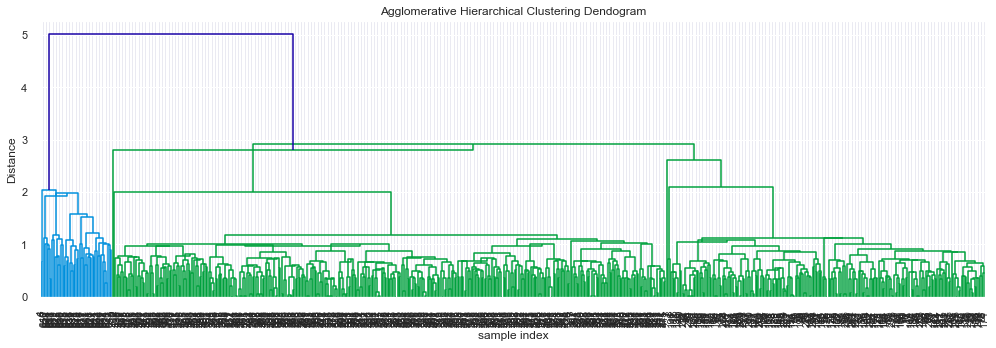

<IPython.core.display.Javascript object>

In [53]:
plt.figure(figsize=(14, 5))
plt.title("Agglomerative Hierarchical Clustering Dendogram")
plt.xlabel("sample index")
plt.ylabel("Distance")
dendrogram(X, leaf_rotation=90.0, leaf_font_size=10.0)
plt.tight_layout()

**K-means vs Hierarchical Clustering**

- Cophenetic correlation for Euclidean distance and complete linkage is 0.8599730607972423
- Cophenetic correlation for Euclidean distance and average linkage is 0.8977080867389372
- Cophenetic correlation for Euclidean distance and single linkage is 0.7391220243806552
- Cophenetic correlation for Euclidean distance and ward linkage is 0.7415156284827493
- Cophenetic correlation for Mahalanobis distance and complete linkage is 0.5422791209801747
- Cophenetic correlation for Mahalanobis distance and average linkage is 0.8326994115042134
- Cophenetic correlation for Mahalanobis distance and single linkage is 0.7058064784553606

**Build Agglomerative Clustering model**

In [54]:
# Trying with K value as 3
HCmodel = AgglomerativeClustering(n_clusters=3, metric="euclidean", linkage="average")
HCmodel.fit(subset_scaled_df)
subset_scaled_df["HC_Clusters"] = HCmodel.labels_

<IPython.core.display.Javascript object>

In [55]:
data["HC_Clusters"] = HCmodel.labels_
cluster_profile = data.groupby("HC_Clusters").mean()
cluster_profile["count_in_each_segments"] = (
    data.groupby("HC_Clusters")["Avg_Credit_Limit"].count().values
)

<IPython.core.display.Javascript object>

In [56]:
# lets display cluster profile
cluster_profile.style.highlight_max(color="blue").highlight_min(color="yellow")

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,K_means_segments,count_in_each_segments
HC_Clusters,,,,,,,
0,33713.178295,5.511628,3.485788,0.984496,2.005168,1.527132,387
1,141040.000000,8.740000,0.600000,10.900000,1.080000,2.000000,50
2,12197.309417,2.403587,0.928251,3.560538,6.883408,1.017937,223


<IPython.core.display.Javascript object>

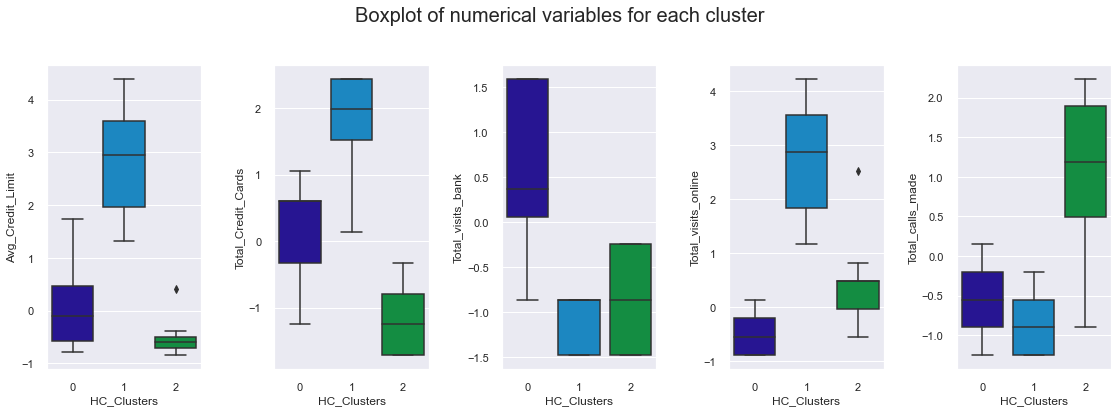

<IPython.core.display.Javascript object>

In [57]:
fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle("Boxplot of numerical variables for each cluster", fontsize=20)
counter = 0
for ii in range(5):
    sns.boxplot(
        ax=axes[ii],
        y=subset_scaled_df[data_col[counter]],
        x=subset_scaled_df["HC_Clusters"],
    )
    counter = counter + 1

fig.tight_layout(pad=2.0)

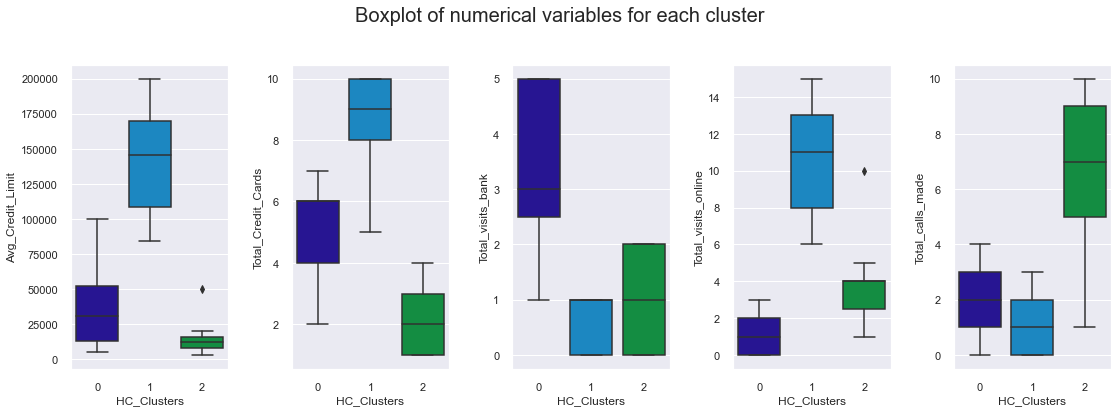

<IPython.core.display.Javascript object>

In [58]:
fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle("Boxplot of numerical variables for each cluster", fontsize=20)
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii], y=data[data_col[counter]], x=data["HC_Clusters"])
    counter = counter + 1

fig.tight_layout(pad=2.0)

In [59]:
# Trying with K value as 3
HCmodel = AgglomerativeClustering(n_clusters=4, metric="euclidean", linkage="average")
HCmodel.fit(subset_scaled_df)
subset_scaled_df["HC_Clusters"] = HCmodel.labels_

<IPython.core.display.Javascript object>

In [60]:
data["HC_Clusters"] = HCmodel.labels_
cluster_profile = data.groupby("HC_Clusters").mean()
cluster_profile["count_in_each_segments"] = (
    data.groupby("HC_Clusters")["Avg_Credit_Limit"].count().values
)

<IPython.core.display.Javascript object>

In [61]:
# lets display cluster profile
cluster_profile.style.highlight_max(color="blue").highlight_min(color="yellow")

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,K_means_segments,count_in_each_segments
HC_Clusters,,,,,,,
0,12197.309417,2.403587,0.928251,3.560538,6.883408,1.017937,223
1,141040.000000,8.740000,0.600000,10.900000,1.080000,2.000000,50
2,33541.450777,5.520725,3.492228,0.984456,2.010363,1.523316,386
3,100000.000000,2.000000,1.000000,1.000000,0.000000,3.000000,1


<IPython.core.display.Javascript object>

### Insights

**Cluster 0:**

- average credit limit of less than 25,000
- total number of credit cards is of 1 to 3 in range
- total visits to the bank is at the most 2 visits
- total visits via online is at the most 4 visits in this cluster.
- total calls made ranges from 5 at the minimum upto around 9 calls in this cluster.

**Cluster 1:**

- total number of credit cards range starts at the maxiumum 5 in this cluster.
- total visits to the bank ranges between 2 to 3 in this cluster.
- total visits via online is at the most 2 visits we can see in this cluster.
- average credit limit ranges from 25,000 to above 50,000 but less than 75,000.
- total calls made ranges from 1 to 3 calls in this cluster.

**Cluster 2:**

- total visits via online is at the 8 to 13 we can see in this cluster.
- total calls made ranges from 0 at the minimum upto around 2 calls in this cluster.
- average credit limit ranges higher than 100000 to 175 0000
- total number of credit cards is of 8 to 10 in range.
- total visits to the bank is at the most 1 visit only .


**Cluster 3:**

- total number of credit cards is of 4 to 6 in range
- total visits to the bank is at the maximum 5 visits we can see in this cluster
- total visits via online is at the most 2 visits we can see in this cluster.
- total calls made ranges from 1 to 3 calls in this cluster
- average credit limit of about below 50,000 in this cluster.

### Insight

Group 1: Call centre

- Almost never visits the bank or uses online services
- Huge number of calls made
- Second largest group
- Very low credit limit
- Low number of credit cards


Group 0: visiting the bank (In-Person)

- Visits the bank often
- Almost no online usage
- Calls rarely
- Largest group
- Mid number of credit cards


Group 2: Online

- Smallest group, and by a large margine
- Huge credit limit
- Lots of credit cards
- Almost never visits the bank
- Banks online extensively
- Almost never calls

**conclusion** 
- K means took lesser time compared to hierarchical clustering
- hierarchical clustering technique gave more distinct clusters
- The hierarchical method did better, with a higher silhouette score .
- 3 clusters are obtained as the appropriate number of clusters

**recommendation**
- Online banking should be promoted and as a result all other means of communication should be contacted either by calls/emails  and advised to switch to online banking 